In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [28]:
df = pd.read_csv('L1_squad_standings_cleaned.csv')
df_pred = pd.read_csv('L1_2023_pred.csv')

to_keep = [
    "Points",
    "Market_value",
    "Pts_year_before"
]

In [29]:
### Function to split the dataframe for the k-fold cross validation

def train_test_split_by_year(year, df):
    test_df = df.loc[df["Season"] == year]
    train_df = df.loc[df["Season"] != year]

    test_df2 = test_df.copy()
    train_df2 = train_df.copy()

    X_train = train_df2[["Market_value", "Pts_year_before"]]
    y_train = train_df2["Points"]

    X_test = test_df2[["Market_value", "Pts_year_before"]]
    y_test = test_df2["Points"]

    #X_train = np.array(X_train)
    #y_train = np.array(y_train)
    #X_test = np.array(X_test)
    #y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test


We'll first split our training and testing set. The training set will contain all data for season from 2011 until 2021 while we keep the 2022 season to test our model.
Then within the training data, we'll perform a 10-fold cross validation using our function above to evaluate our model for each season.

In [30]:
### Splitting the dataframe in 2 different dataframe. The df_test will be used to evaluate our model on new, unseen data.
df_train = df[df['Season'] != 2022]
df_test = df[df['Season'] == 2022]

#Create Linear Regression model
model = LinearRegression()

#Initialize lists to store predicted values and actual values during cross validation
y_pred_cv = []
y_actual_cv = []

unique_seasons = df_train['Season'].unique()
for season in unique_seasons:
    X_train, X_test, y_train, y_test = train_test_split_by_year(season, df_train)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_pred_cv.extend(y_pred)
    y_actual_cv.extend(y_test)

#Evaluate the model
mae_cv = metrics.mean_absolute_error(y_actual_cv, y_pred_cv)
mse_cv = metrics.mean_squared_error(y_actual_cv, y_pred_cv)
rmse_cv = np.sqrt(mse_cv)

print('Mean Absolute Error (CV):', mae_cv)
print('Mean Squared Error (CV):', mse_cv)
print('Root Mean Squared Error (CV):', rmse_cv)


Mean Absolute Error (CV): 7.702720395042173
Mean Squared Error (CV): 101.65553194919805
Root Mean Squared Error (CV): 10.082436806109824


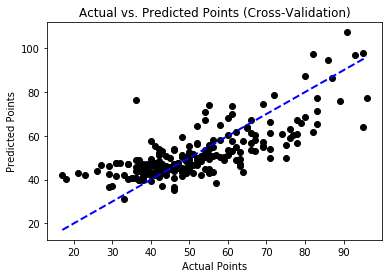

In [31]:
# Visualize the results
plt.scatter(y_actual_cv, y_pred_cv, color='black')
plt.plot([min(y_actual_cv), max(y_actual_cv)], [min(y_actual_cv), max(y_actual_cv)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points (Cross-Validation)')
plt.show()

Mean Absolute Error (CV): 9.262656641969965
Mean Squared Error (CV): 180.88784147905693
Root Mean Squared Error (CV): 13.449455062531602


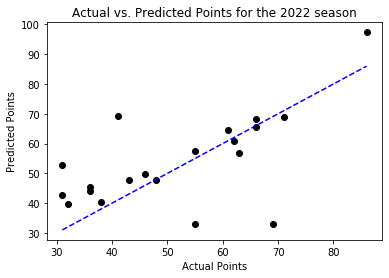

In [32]:
### We then use evaluate our model on the test set

X_test = df_test[["Market_value", "Pts_year_before"]]
y_pred = model.predict(X_test)

mae_cv = metrics.mean_absolute_error(y_test, y_pred)
mse_cv = metrics.mean_squared_error(y_test, y_pred)
rmse_cv = np.sqrt(mse_cv)

print('Mean Absolute Error (CV):', mae_cv)
print('Mean Squared Error (CV):', mse_cv)
print('Root Mean Squared Error (CV):', rmse_cv)

## Plotting the results
plt.scatter(y_test, y_pred, color='black')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs. Predicted Points for the 2022 season')
plt.show()

In [39]:
## Prediction with our model for the 2023 season

X_pred = df_pred[["Market_value", "Pts_year_before"]]
y_pred = model.predict(X_pred)

y_pred_df = pd.DataFrame(y_pred, columns=['Points'])

result = pd.concat([X_pred, y_pred_df], axis=1)

result


,Market_value,Pts_year_before,Points
0,1070000000,85.0,103.557250
1,344800000,65.0,66.281099
2,280500000,68.0,65.388910
3,248800000,73.0,66.728925
4,245000000,58.0,59.004066
5,226600000,67.0,62.864304
6,212550000,84.0,70.931500
7,192650000,62.0,59.065027
8,129850000,40.0,45.591512
9,113400000,36.0,42.953289


In [42]:
pred = df_pred.merge(result, how='left', on=['Market_value', 'Pts_year_before'])
pred['Points'] = pred['Points'].round().astype(int)
pred = pred.sort_values(by='Points', ascending=False)

In [43]:
pred

,Season,Team,Squad,Average_age,Market_value,Pts_year_before,Points
0,2023,Paris Saint-Germain,29,25.1,1070000000,85.0,104
6,2023,RC Lens,29,25.5,212550000,84.0,71
3,2023,Olympique Marseille,25,25.3,248800000,73.0,67
1,2023,AS Monaco,27,23.6,344800000,65.0,66
2,2023,Stade Rennais FC,25,24.1,280500000,68.0,65
5,2023,LOSC Lille,24,25.5,226600000,67.0,63
4,2023,OGC Nice,29,23.8,245000000,58.0,59
7,2023,Olympique Lyon,28,24.6,192650000,62.0,59
16,2023,Clermont Foot 63,24,26.4,51750000,59.0,52
11,2023,FC Lorient,30,24.6,110900000,55.0,52


NameError: name 'df_standings_2022' is not defined